<h1 align='center'><u>Covid-19 case Forecasting</u></h1> 

### # Data Source:- https://www.kaggle.com/sudalairajkumar/covid19-in-india

### # Context
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

State level data comes from Ministry of Health & Family Welfare

Individual level data comes from covid19india

### # Content
 COVID-19 cases at daily level is present in covid_19_india.csv file

   Individual level details are present in IndividualDetails.csv file and is obtained from this link

   Population at state level is present in population_india_census2011.csv file

   Number of COVID-19 tests at daily level in ICMRTestingDetails.csv file

   Number of hospital beds in each state in present in HospitalBedsIndia.csv file and is extracted from this link

### # Note:- 
 * Data is collected from the Kaggle.
 * It is the data of Covid-19 India last updated in 30/05/20.

## Importing Important libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore the harmless warning 
import warnings
warnings.filterwarnings("ignore")

# 1. Importing dataset:~

In [2]:
df = pd.read_csv('datasets_557629_1198871_covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2486 non-null   int64 
 1   Date                      2486 non-null   object
 2   Time                      2486 non-null   object
 3   State/UnionTerritory      2486 non-null   object
 4   ConfirmedIndianNational   2486 non-null   object
 5   ConfirmedForeignNational  2486 non-null   object
 6   Cured                     2486 non-null   int64 
 7   Deaths                    2486 non-null   int64 
 8   Confirmed                 2486 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 174.9+ KB


# 2. Data Cleaning:~

In [4]:
# checking for any missing values
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2481,2482,30/05/20,8:00 AM,Tripura,-,-,171,0,251
2482,2483,30/05/20,8:00 AM,Uttarakhand,-,-,102,5,716
2483,2484,30/05/20,8:00 AM,Uttar Pradesh,-,-,4244,198,7284
2484,2485,30/05/20,8:00 AM,West Bengal,-,-,1775,302,4813
2485,2486,30/05/20,8:00 AM,Cases being reassigned to states,-,-,0,0,5043


In [6]:
df[df['ConfirmedForeignNational']=='-'].index

Int64Index([ 446,  447,  448,  449,  450,  451,  452,  453,  454,  455,
            ...
            2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485],
           dtype='int64', length=2040)

In [7]:
df.shape

(2486, 9)

#### Form above we got some missing values in " - " form. We will fill it with 0 value as there are 968 missing values and we can't remove them in this small dataset.

In [8]:
df['ConfirmedForeignNational'].replace(to_replace='-', value='0',inplace=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2481,2482,30/05/20,8:00 AM,Tripura,-,0,171,0,251
2482,2483,30/05/20,8:00 AM,Uttarakhand,-,0,102,5,716
2483,2484,30/05/20,8:00 AM,Uttar Pradesh,-,0,4244,198,7284
2484,2485,30/05/20,8:00 AM,West Bengal,-,0,1775,302,4813
2485,2486,30/05/20,8:00 AM,Cases being reassigned to states,-,0,0,0,5043


# 3. Data Visualization:~

In [10]:
data = df.tail(32)
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2454,2455,30/05/20,8:00 AM,Bihar,-,0,1211,15,3376
2455,2456,30/05/20,8:00 AM,Chandigarh,-,0,189,4,289
2456,2457,30/05/20,8:00 AM,Chhattisgarh,-,0,100,1,415
2457,2458,30/05/20,8:00 AM,Dadar Nagar Haveli,-,0,0,0,2
2458,2459,30/05/20,8:00 AM,Delhi,-,0,7846,398,17386
2459,2460,30/05/20,8:00 AM,Goa,-,0,41,0,69
2460,2461,30/05/20,8:00 AM,Gujarat,-,0,8611,980,15934
2461,2462,30/05/20,8:00 AM,Haryana,-,0,940,19,1721
2462,2463,30/05/20,8:00 AM,Himachal Pradesh,-,0,87,5,295
2463,2464,30/05/20,8:00 AM,Jammu and Kashmir,-,0,875,28,2164


In [12]:
data = data[:-1]

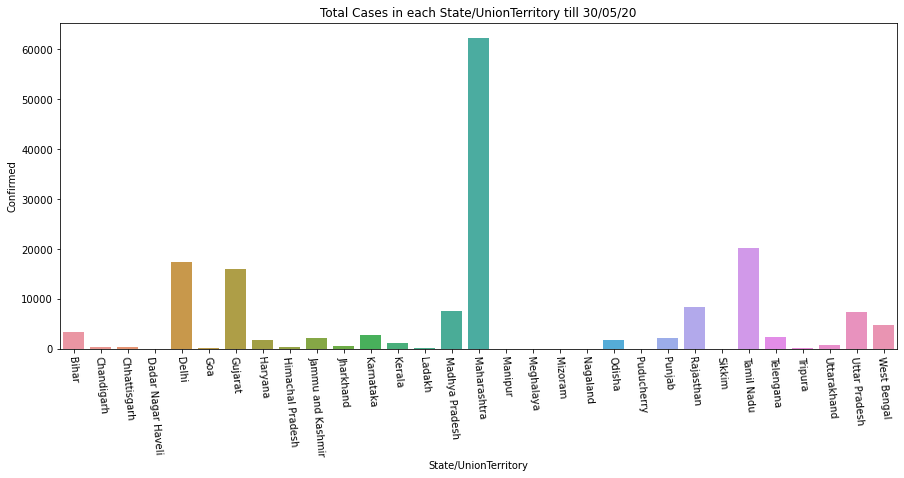

In [14]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "State/UnionTerritory", y = "Confirmed", ax=ax, data=data)
ax.set(title='Total Cases in each State/UnionTerritory till 30/05/20')
plt.xticks(rotation=-85);

In [15]:
a = data[data['Confirmed']>=10000]
a

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2458,2459,30/05/20,8:00 AM,Delhi,-,0,7846,398,17386
2460,2461,30/05/20,8:00 AM,Gujarat,-,0,8611,980,15934
2469,2470,30/05/20,8:00 AM,Maharashtra,-,0,26997,2098,62228
2479,2480,30/05/20,8:00 AM,Tamil Nadu,-,0,11313,154,20246


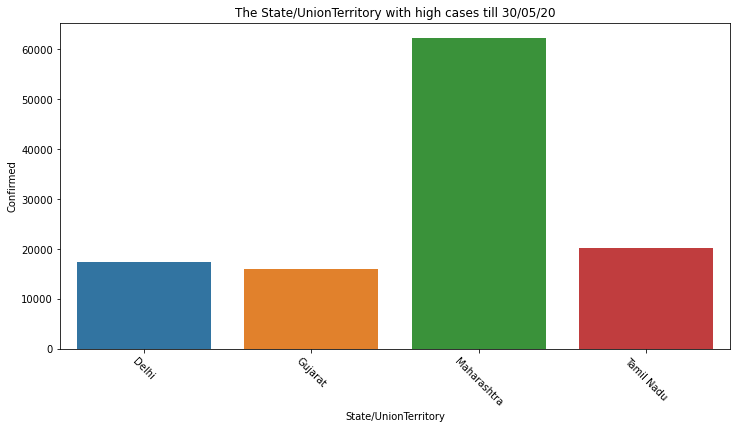

In [16]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "State/UnionTerritory", y = "Confirmed", ax=ax, data=a)
ax.set(title='The State/UnionTerritory with high cases till 30/05/20')
plt.xticks(rotation=-45);

In [19]:
b = data[data['Confirmed']<=50]
b

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2457,2458,30/05/20,8:00 AM,Dadar Nagar Haveli,-,0,0,0,2
2471,2472,30/05/20,8:00 AM,Meghalaya,-,0,12,1,27
2472,2473,30/05/20,8:00 AM,Mizoram,-,0,1,0,1
2473,2474,30/05/20,8:00 AM,Nagaland,-,0,0,0,25
2478,2479,30/05/20,8:00 AM,Sikkim,-,0,0,0,1


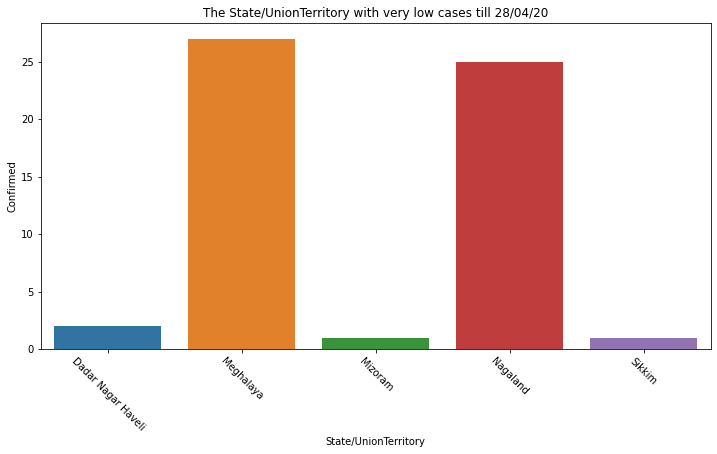

In [20]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "State/UnionTerritory", y = "Confirmed", ax=ax, data=b)
ax.set(title='The State/UnionTerritory with very low cases till 28/04/20')
plt.xticks(rotation=-45);

# 4. Feature Engineering:~

In [21]:
# changing the data type of ConfirmedForeignNational feature
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].apply(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2486 non-null   int64 
 1   Date                      2486 non-null   object
 2   Time                      2486 non-null   object
 3   State/UnionTerritory      2486 non-null   object
 4   ConfirmedIndianNational   2486 non-null   object
 5   ConfirmedForeignNational  2486 non-null   int64 
 6   Cured                     2486 non-null   int64 
 7   Deaths                    2486 non-null   int64 
 8   Confirmed                 2486 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 174.9+ KB


In [22]:
# we will negate the ConfirmedForeignNational from confirmed case for only indian nationals
df['Confirmed'] = df['Confirmed'] - df['ConfirmedForeignNational']
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [23]:
# Dropping unimportant features
df1 = df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Time','State/UnionTerritory','Sno'],1)
df1.head()

,Date,Cured,Deaths,Confirmed
0,30/01/20,0,0,1
1,31/01/20,0,0,1
2,01/02/20,0,0,2
3,02/02/20,0,0,3
4,03/02/20,0,0,3


In [24]:
# Creating a new column which will negate the total of Cured and Death cases from the total confirmed cases
df1['case'] = df1['Confirmed'] - (df1['Cured'] + df1['Deaths'])

In [25]:
df1.head()

,Date,Cured,Deaths,Confirmed,case
0,30/01/20,0,0,1,1
1,31/01/20,0,0,1,1
2,01/02/20,0,0,2,2
3,02/02/20,0,0,3,3
4,03/02/20,0,0,3,3


In [26]:
df2 = df1.drop(['Cured','Deaths','Confirmed'],1)
df2.head()

,Date,case
0,30/01/20,1
1,31/01/20,1
2,01/02/20,2
3,02/02/20,3
4,03/02/20,3


In [27]:
df3 = df2.copy() # Create a copy of data we want

In [28]:
# This is the most important function which will create a data which will tell total no of cases in each day.
def data():
    df4 = pd.DataFrame()
    date = []
    total_case = []
    for i in range(len(df3)):
        y = df3['Date'][i]       
        if i ==0:
            x = df3['Date'][i]
            a = df3[df2['Date']==x].sum()
            b = a['case']
            date.append(x)
            total_case.append(b)
            i += 1
        else:
            h = df3['Date'][i-1] 
            if(y == h):
                i += 1
            else:
                x = df3['Date'][i]
                z = df3['Date'][i-1]
                a = df3[df3['Date']==x].sum()
                c = df3[df3['Date']==z].sum()
                b = a['case']
                d = c['case']
                e = b-d
                date.append(x)
                total_case.append(e)
                i += 1 
    df4["date"] = date 
    df4["total_case"] = total_case
    return df4

In [29]:
df4 = data()
df4.head()

,date,total_case
0,30/01/20,1
1,31/01/20,0
2,01/02/20,1
3,02/02/20,1
4,03/02/20,0


In [30]:
df5 = df4.copy()

In [31]:
df5['date'] = pd.to_datetime(df5['date'], dayfirst=True)
df5.head()

,date,total_case
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-03,0


In [32]:
data = df5.copy()

In [33]:
data.set_index('date',inplace=True) # set the date column as index

In [34]:
data.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30'],
              dtype='datetime64[ns]', name='date', length=122, freq=None)

In [35]:
# setting our frequency of date index as 'D' it indicate we are working on days
data.index.freq = 'D'

In [36]:
data.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30'],
              dtype='datetime64[ns]', name='date', length=122, freq='D')

In [39]:
data.tail

<bound method NDFrame.tail of             total_case
date                  
2020-01-30           1
2020-01-31           0
2020-02-01           1
2020-02-02           1
2020-02-03           0
...                ...
2020-05-26        3619
2020-05-27        2282
2020-05-28        3106
2020-05-29           0
2020-05-30         312

[122 rows x 1 columns]>

In [41]:
data = data[:-2]

# 5. Pre- steps for the Forcasting:~

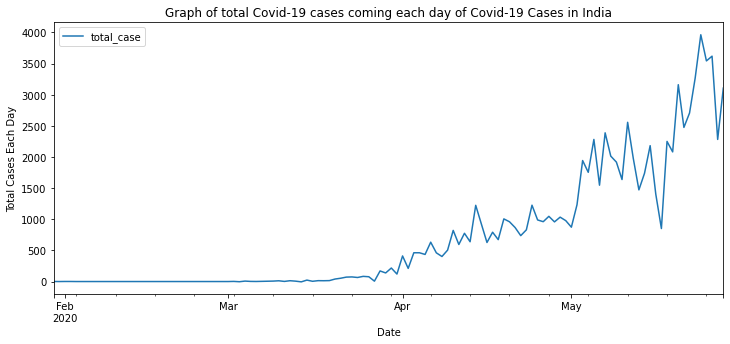

In [42]:
ax = data.plot(figsize=(12,5));
ax.set(title='Graph of total Covid-19 cases coming each day of Covid-19 Cases in India');
ax.set(xlabel = 'Date');
ax.set(ylabel = 'Total Cases Each Day');


#### From above graph it look like Covid-19 Cases increases from the start of April month.

### Run an ETS Decomposition (optional):~

In [43]:
data

,total_case
date,
2020-01-30,1
2020-01-31,0
2020-02-01,1
2020-02-02,1
2020-02-03,0
...,...
2020-05-24,3963
2020-05-25,3543
2020-05-26,3619


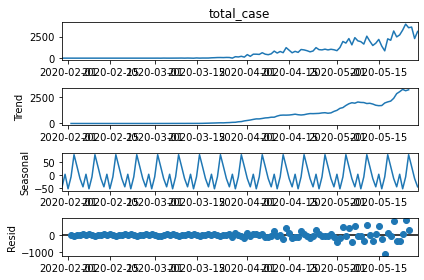

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['total_case'], model='additive')  # model='add' also works
result.plot();

## pmdarima Auto-ARIMA

* install this third-party tool separate from statsmodels if not installed.

    *use !pip install pmdarima

In [45]:
from pmdarima import auto_arima

In [125]:
auto_arima(data['total_case'],seasonal=True,m=30).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 30)   Log Likelihood                -648.014
Date:                             Sun, 31 May 2020   AIC                           1302.027
Time:                                     14:39:46   BIC                           1309.493
Sample:                                          0   HQIC                          1305.036
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.8186     15.158      1.571      0.116      -5.891      53.529
ma.L1         -0.5937      0.057    -10.327      0.000      -0.706      -0.481
sigma2      1.231e+05    1.2e+04     10.290      0.000    9.96e+04    1.46e+05
===================================================================================
Ljung-Box (Q):                       43.37   Jarque-Bera (JB):                37.89
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):             115.58   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
len(data)

120

In [49]:
# Set one year for testing
train = data.iloc[:100]
test = data.iloc[100:]

In [50]:
print(train.shape)
print(test.shape)

(100, 1)
(20, 1)


In [51]:
train.head()

,total_case
date,
2020-01-30,1
2020-01-31,0
2020-02-01,1
2020-02-02,1
2020-02-03,0


## Fit a SARIMAX Model

In [202]:
model = SARIMAX(train['total_case'],order=(0, 1, 1), seasonal_order= (0, 3, 0, 30))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          total_case   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(0, 3, [], 30)   Log Likelihood                 -68.983
Date:                             Sun, 31 May 2020   AIC                            141.966
Time:                                     14:58:46   BIC                            142.360
Sample:                                 01-30-2020   HQIC                           141.114
                                      - 05-08-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9980     85.046     -0.012      0.991    -167.686     165.690
sigma2      8.999e+04   7.67e+06      0.012      0.991   -1.49e+07    1.51e+07
===================================================================================
Ljung-Box (Q):                        9.95   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.27   Prob(JB):                         0.59
Heteroskedasticity (H):               1.85   Skew:                            -0.76
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,2) Predictions')

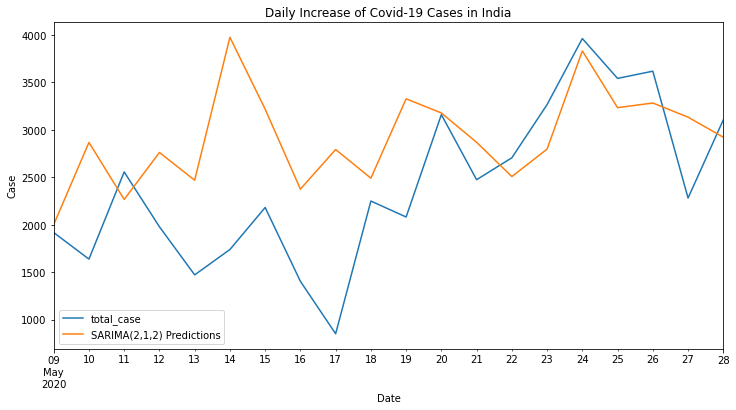

In [204]:
# Plot predictions against known values
title = 'Daily Increase of Covid-19 Cases in India'
ylabel='Case'
xlabel='Date'

ax = test['total_case'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [205]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['total_case'], predictions)
print(f'SARIMA(2,1,2) MSE Error: {error:11.10}')

SARIMA(2,1,2) MSE Error: 850985.8164


In [206]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['total_case'], predictions)
print(f'SARIMA(2,1,2) RMSE Error: {error:11.10}')

SARIMA(2,1,2) RMSE Error: 922.4889248


# 6. Forcasting:~

In [151]:
model = SARIMAX(data['total_case'],order=(0, 1, 1), seasonal_order= (0, 3, 0, 30))
results = model.fit()
fcast = results.predict(len(data),len(data)+60,typ='levels').rename('Forecast')

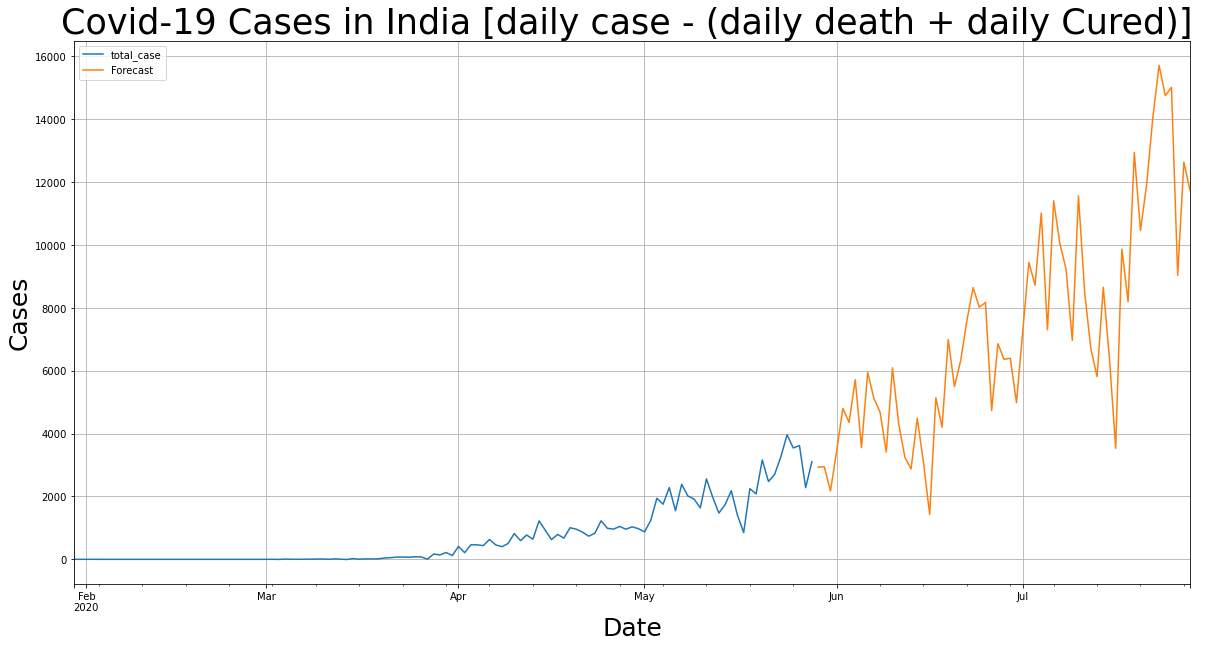

In [207]:
# Plot predictions against known values

ax = data['total_case'].plot(legend=True,figsize=(20,10),title=title)
ax.set_title('Covid-19 Cases in India [daily case - (daily death + daily Cured)] ', fontsize=35,color = 'k')
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Cases', fontsize=25)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.grid(b=True, which='major')
plt.savefig('8 Forecast.png', dpi=57)

In [153]:
fcast

2020-05-29     2933.569887
2020-05-30     2946.990291
2020-05-31     2175.103902
2020-06-01     3447.268058
2020-06-02     4802.837055
                  ...     
2020-07-24    14754.112409
2020-07-25    15016.897569
2020-07-26     9037.326658
2020-07-27    12637.688248
2020-07-28    11733.889373
Freq: D, Name: Forecast, Length: 61, dtype: float64

In [154]:
Forecasted_data = pd.DataFrame({'Forecasted_Cases': fcast})

In [155]:
Forecasted_data['Forecasted_Cases'].sum()

443470.4365391982

### I don't say it will be the case for next 2 month because:- 
* It is a new virus so we don't have enough data for forecasting.
* I used this Data for Practice.

<h1 align='center'>*----E N D----*</h1>